In [1]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New section

In [2]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.2 MB/s 
     |████████████████████████████████| 62 kB 325 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# API authentication

auth = tweepy.OAuthHandler('Zuah3SHPyrYZJRrqfladxzsDj', 'sqcpXcg90jZJ68BJkx0QhHNs2pG4al1slbEe7vO63xIfRTlXej')

#set access token 

auth.set_access_token('222050461-BPfTuaF75V7lYKLgXDSMUfP8v0EcnewObf6gzfCr', 'etAXBGMedOpWEn0bl8EqN0SaFixapHpahVcfuxk4BhHhZ')

#create API object while passing authentication information

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# search hastags

keywords = '#MenToo' or '#believeallwomen' or '#AmberHeardIsNotAlone'
limit = 100000

tweets = tweepy.Cursor(api.search_tweets, q=keywords,lang='en', count=100, tweet_mode='extended').items(limit)

i= 1
for t in tweets:
  print(str(i)+ ') '+ str(t._json['retweet_count']) + '\n')
  i = i+ 1


Streaming output truncated to the last 5000 lines.
2201) 0

2202) 0

2203) 0

2204) 0

2205) 0

2206) 0

2207) 365

2208) 0

2209) 498

2210) 0

2211) 0

2212) 0

2213) 0

2214) 0

2215) 0

2216) 0

2217) 0

2218) 0

2219) 23

2220) 887

2221) 0

2222) 0

2223) 174

2224) 174

2225) 0

2226) 1

2227) 174

2228) 5

2229) 174

2230) 174

2231) 174

2232) 0

2233) 498

2234) 5

2235) 365

2236) 0

2237) 174

2238) 1

2239) 174

2240) 11

2241) 1

2242) 174

2243) 174

2244) 174

2245) 174

2246) 174

2247) 498

2248) 498

2249) 174

2250) 18

2251) 5

2252) 174

2253) 2

2254) 174

2255) 498

2256) 5

2257) 174

2258) 174

2259) 174

2260) 174

2261) 174

2262) 498

2263) 1

2264) 1

2265) 174

2266) 174

2267) 5

2268) 14

2269) 5

2270) 498

2271) 18

2272) 498

2273) 15

2274) 498

2275) 498

2276) 2

2277) 1

2278) 19

2279) 2

2280) 1

2281) 19

2282) 28

2283) 14

2284) 1

2285) 1

2286) 498

2287) 1

2288) 81

2289) 3

2290) 498

2291) 11

2292) 0

2293) 1

2294) 4

2295) 498

2296

In [7]:
# create a dataframe for tweets
keywords = ['#MenToo' or '#believeallwomen' or '#AmberHeardIsNotAlone']
limit = 10000

# this cursor object should be in same cell
tweets = tweepy.Cursor(api.search_tweets, q=keywords,lang='en', count=100, since_id='2022-04-11', tweet_mode='extended').items(limit)


df = pd.DataFrame([[tweet.user.screen_name, tweet.full_text] for tweet in tweets], columns=['User', 'Tweets'])

df.head()

,User,Tweets
0,ItsRozBitches,RT @ibelieveamber: #mentoo crowd fail to reali...
1,admiralrebelyn,this bullshit needs to stop. i was weeping rea...
2,Lechantdejuan,RT @JamesShala1: Exclusive : Caught kissing Ca...
3,moosashead,RT @ibelieveamber: #mentoo crowd fail to reali...
4,zeina_99_,RT @ibelieveamber: #mentoo crowd fail to reali...


# New section

In [8]:
# Data cleaning

def clearText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # to remove @ mentions in tweets
  text = re.sub(r'RT[\s]+', '', text) # remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) # remove links
  text = re.sub(r'#', '', text) # remove hashtags
  return text

# cleaning the text
df['Tweets'] = df['Tweets'].apply(clearText) 

# show clean text

df



,User,Tweets
0,ItsRozBitches,: mentoo crowd fail to realize that most men a...
1,admiralrebelyn,this bullshit needs to stop. i was weeping rea...
2,Lechantdejuan,: Exclusive : Caught kissing Cara Delevigne - ...
3,moosashead,: mentoo crowd fail to realize that most men a...
4,zeina_99_,: mentoo crowd fail to realize that most men a...
...,...,...
4695,Beatrix32021692,"""He had physical acts of violence perpetrated ..."
4696,BunnLoki,: She try to destroy his career it backfires. ...
4697,latenightpc268,"FINALLY!!! the trailer for ""OBLITERATE"" a Horr..."
4698,faithlovew,: Woman ejected from concert for hitting man: ...


In [9]:
# function to get subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# function to get polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity
  

# adding subjectivity and polarity in dataframe

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# show dataframe with new columns

df

,User,Tweets,Subjectivity,Polarity
0,ItsRozBitches,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250
1,admiralrebelyn,this bullshit needs to stop. i was weeping rea...,0.950000,0.750000
2,Lechantdejuan,: Exclusive : Caught kissing Cara Delevigne - ...,0.500000,0.500000
3,moosashead,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250
4,zeina_99_,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250
...,...,...,...,...
4695,Beatrix32021692,"""He had physical acts of violence perpetrated ...",0.121429,0.000000
4696,BunnLoki,: She try to destroy his career it backfires. ...,0.191667,-0.050000
4697,latenightpc268,"FINALLY!!! the trailer for ""OBLITERATE"" a Horr...",0.611111,0.141667
4698,faithlovew,: Woman ejected from concert for hitting man: ...,0.000000,0.000000


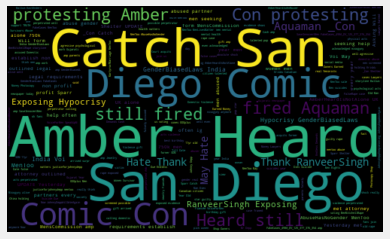

In [10]:
# visualize the wordcloud (not needed for opinion formation model)

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# function for analysis to find negative, positive and neutral tweets

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'

# new column to store analysis 

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head(50)

,User,Tweets,Subjectivity,Polarity,Analysis
0,ItsRozBitches,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
1,admiralrebelyn,this bullshit needs to stop. i was weeping rea...,0.950000,0.750000,Positive
2,Lechantdejuan,: Exclusive : Caught kissing Cara Delevigne - ...,0.500000,0.500000,Positive
3,moosashead,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
4,zeina_99_,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
5,rationalreserve,3. I'm putting the responsibility on feminis...,0.378571,0.000000,Neutral
6,agnes_goldberg,Thanks uniquely awesomeness. You are an a...,0.635476,0.233810,Positive
7,GaryGrit,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
8,TheInvi80692073,: Can we PLEASE get male abuse victims more he...,0.300000,0.250000,Positive
9,TheInvi80692073,: I love Gary Oldman another amazing actor wi...,0.566667,0.433333,Positive


In [12]:
p,n,nu = 0, 0, 0
for i in df['Analysis']:
  if i == 'Positive':
    p = p+1
  elif i == 'Negative':
    n = n+1
  else:
    nu = nu+1

print('positive: ', p)
print('negative: ', n)
print('neutral: ', nu)

positive:  2184
negative:  1040
neutral:  1476


In [13]:
dfc = df.drop_duplicates(keep='first')

In [14]:
dfc

,User,Tweets,Subjectivity,Polarity,Analysis
0,ItsRozBitches,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
1,admiralrebelyn,this bullshit needs to stop. i was weeping rea...,0.950000,0.750000,Positive
2,Lechantdejuan,: Exclusive : Caught kissing Cara Delevigne - ...,0.500000,0.500000,Positive
3,moosashead,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
4,zeina_99_,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
...,...,...,...,...,...
4695,Beatrix32021692,"""He had physical acts of violence perpetrated ...",0.121429,0.000000,Neutral
4696,BunnLoki,: She try to destroy his career it backfires. ...,0.191667,-0.050000,Negative
4697,latenightpc268,"FINALLY!!! the trailer for ""OBLITERATE"" a Horr...",0.611111,0.141667,Positive
4698,faithlovew,: Woman ejected from concert for hitting man: ...,0.000000,0.000000,Neutral


In [15]:
df

,User,Tweets,Subjectivity,Polarity,Analysis
0,ItsRozBitches,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
1,admiralrebelyn,this bullshit needs to stop. i was weeping rea...,0.950000,0.750000,Positive
2,Lechantdejuan,: Exclusive : Caught kissing Cara Delevigne - ...,0.500000,0.500000,Positive
3,moosashead,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
4,zeina_99_,: mentoo crowd fail to realize that most men a...,0.518750,-0.156250,Negative
...,...,...,...,...,...
4695,Beatrix32021692,"""He had physical acts of violence perpetrated ...",0.121429,0.000000,Neutral
4696,BunnLoki,: She try to destroy his career it backfires. ...,0.191667,-0.050000,Negative
4697,latenightpc268,"FINALLY!!! the trailer for ""OBLITERATE"" a Horr...",0.611111,0.141667,Positive
4698,faithlovew,: Woman ejected from concert for hitting man: ...,0.000000,0.000000,Neutral


In [16]:
from google.colab import files
dfc.to_csv('MenToo_cleanData_updated.csv', encoding='utf-8-sig')
files.download('MenToo_cleanData_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

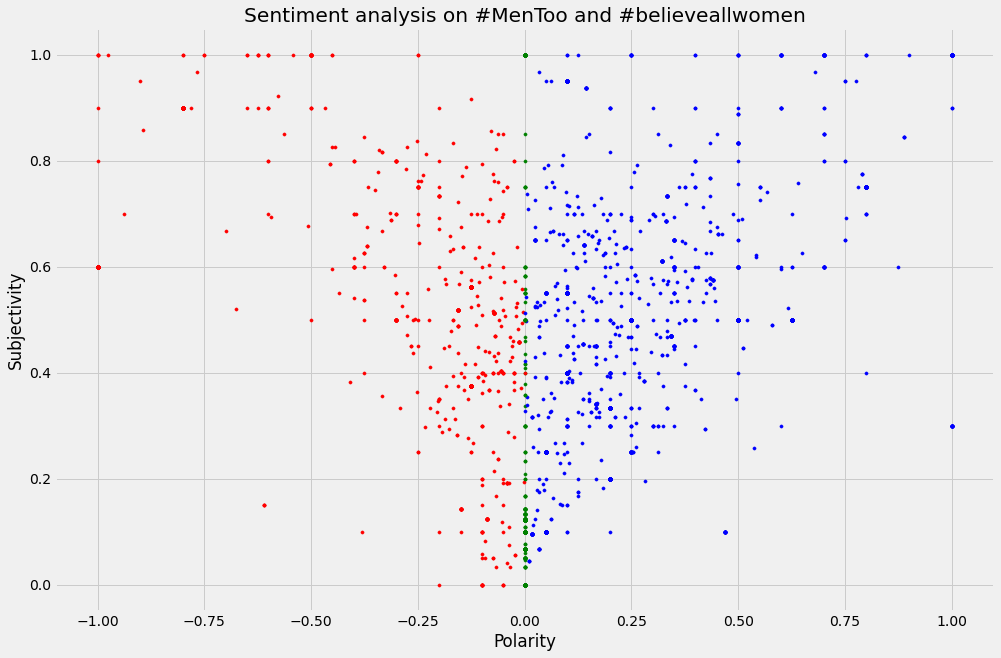

In [17]:
# plot polarity and subjectivity

plt.figure(figsize=(15,10))
for i in range(0, df.shape[0]):
  if df['Analysis'][i] == 'Positive':
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue', s=10)   # s=10 used for markersize
  elif df['Analysis'][i] == 'Negative':
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red', s=10)   # s=10 used for markersize
  else:
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green', s=10)   # s=10 used for markersize

plt.title('Sentiment analysis on #MenToo and #believeallwomen')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

